In [2]:
# By: Fady Motir

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import tensorflow as tf 

from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Input


import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

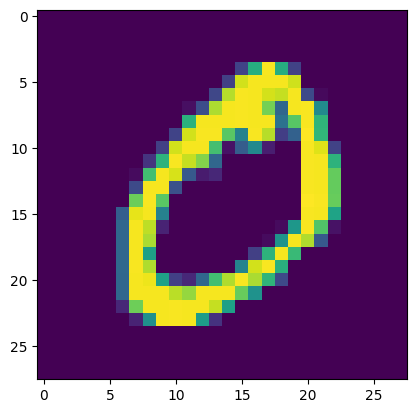

In [6]:
# Visualize 
plt.imshow(X_train[1])

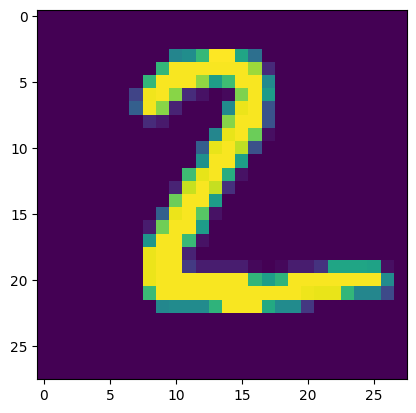

In [7]:
 plt.imshow(X_test[1])

In [9]:
# Cnvert into Vector
X_train = X_train.reshape(X_train.shape[0],28*28)
X_test = X_test.reshape(X_test.shape[0],28*28)
X_train.shape

(60000, 784)

In [10]:
# Rescale 
X_train.max()

255

In [11]:
# Speed up the processing process to avoid Overfitting problems
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.max()

1.0

In [12]:
# Model

# bottleneck = Z "latent space"
input_layer = Input(shape = (X_train.shape[1]))
bottleneck = Dense(32, activation='relu', name= 'bottleneck')(input_layer)
output = Dense(X_train.shape[1], activation='sigmoid', name= 'output')(bottleneck)

In [13]:
auto_encoder = Model(input_layer, output)
auto_encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Separate between encoder and decoder 

# Encoder
encoder = Model(input_layer, bottleneck)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
Total params: 25120 (98.12 KB)
Trainable params: 25120 (98.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Decoder
decoder = Model(bottleneck,output)
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 25872 (101.06 KB)
Trainable params: 25872 (101.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
auto_encoder.compile(loss = 'mse', optimizer='adam')
history = auto_encoder.fit(X_train, X_train, epochs= 50, batch_size= 64)    

Epoch 1/50
938/938 [==============================] - 6s 3ms/step - loss: 0.0422
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0184
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0133
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0115
Epoch 5/50
938/938 [==============================] - 2s 3ms/step - loss: 0.0109
Epoch 6/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0107
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0106
Epoch 8/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0105
Epoch 9/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0104
Epoch 10/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0103
Epoch 11/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0103
Epoch 12/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0102
Epoch 13/50
938/938 [====

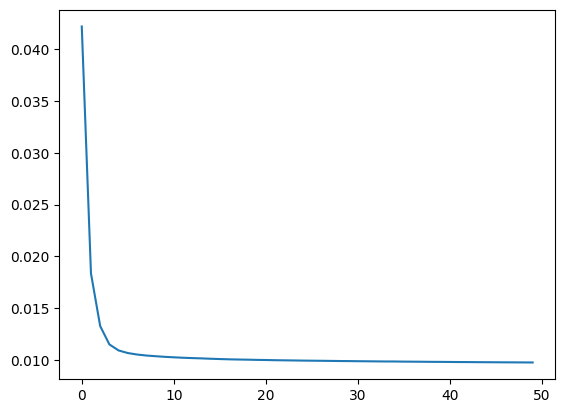

In [17]:
plt.plot(history.history['loss'])

In [18]:
encoded_data = encoder.predict(X_test,batch_size= 512)
encoded_data.shape

20/20 [==============================] - 0s 2ms/step


(10000, 32)

In [19]:
output_data = decoder.predict(encoded_data, batch_size= 512)
output_data.shape

20/20 [==============================] - 0s 1ms/step


(10000, 784)

In [20]:
output_data = output_data.reshape(output_data.shape[0], 28,28)
output_data

array([[[6.94520054e-07, 1.55014857e-06, 1.06777009e-06, ...,
         3.17399497e-07, 4.99579983e-07, 2.21489529e-07],
        [6.47402771e-07, 9.15883618e-07, 3.39099557e-07, ...,
         2.08325014e-06, 3.66462496e-06, 2.02085084e-06],
        [5.01628563e-07, 4.85977637e-07, 3.72064136e-07, ...,
         2.19966751e-07, 3.07757375e-07, 1.72638750e-06],
        ...,
        [8.16621537e-07, 1.76566300e-06, 7.68117900e-07, ...,
         2.03689660e-06, 9.06528101e-07, 7.54887822e-07],
        [1.92819584e-07, 3.36469014e-07, 8.90209151e-07, ...,
         7.36174741e-07, 7.79709694e-07, 1.96886248e-07],
        [7.44285217e-07, 3.51549090e-07, 1.24993755e-06, ...,
         8.29030569e-07, 1.34656932e-06, 1.11319014e-06]],

       [[3.40956376e-07, 5.62420190e-08, 3.64598485e-08, ...,
         1.30424311e-08, 6.86554387e-08, 1.20197370e-07],
        [7.06017218e-08, 3.78069558e-08, 4.33446523e-08, ...,
         8.17396824e-07, 3.96393091e-07, 1.07829642e-07],
        [4.23626290e-08, 

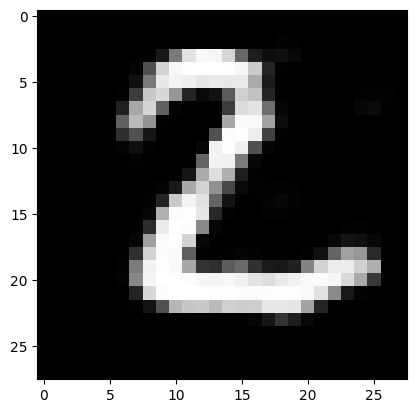

In [21]:
plt.imshow(output_data[1], cmap = 'gray')

In [22]:
X_test = X_test.reshape(10000,28,28)
X_test.shape

(10000, 28, 28)

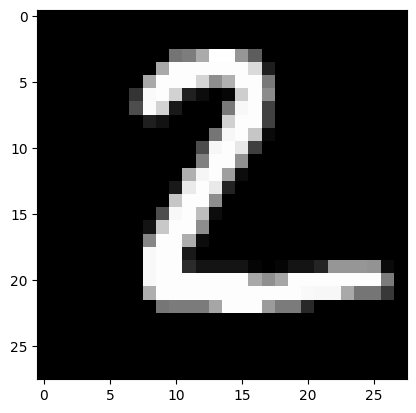

In [23]:
plt.imshow(X_test[1], cmap = 'gray')